In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_validate, StratifiedKFold, train_test_split

from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
X = np.load('data/data_2/X.npy').astype(np.int8)
y = np.load('data/data_2/y.npy').astype(np.int8)

In [4]:
np.unique(y, return_counts=True)

(array([1, 2], dtype=int8), array([305, 923]))

In [5]:
model_names = []
for model in [DummyClassifier, LogisticRegression, SVC,
              DecisionTreeClassifier, RandomForestClassifier,
              KNeighborsClassifier, XGBClassifier]:
    model_names.append(model.__name__)

model_names

['DummyClassifier',
 'LogisticRegression',
 'SVC',
 'DecisionTreeClassifier',
 'RandomForestClassifier',
 'KNeighborsClassifier',
 'XGBClassifier']

In [6]:
scoring = {'accuracy': 'accuracy',
           'precision': make_scorer(recall_score, pos_label=2),
           'recall': make_scorer(precision_score, pos_label=2, zero_division=0),
           'F1-score': 'f1',
           'recall -': make_scorer(recall_score, pos_label=1),
           'precision -': make_scorer(precision_score, pos_label=1, zero_division=0),
           }

scores_df = pd.DataFrame(index=model_names, columns=list(scoring.keys()))

In [7]:
clf = DummyClassifier()
scores = cross_validate(clf, X, y, cv=5, scoring=scoring, n_jobs=-1)
mean_scores = pd.DataFrame(scores).apply(np.mean)

In [8]:
scores_df.loc[type(clf).__name__] = mean_scores.values[2:]
scores_df

,accuracy,precision,recall,F1-score,recall -,precision -
DummyClassifier,0.751628,1.0,0.751628,0.0,0.0,0.0
LogisticRegression,NaN,NaN,NaN,NaN,NaN,NaN
SVC,NaN,NaN,NaN,NaN,NaN,NaN
DecisionTreeClassifier,NaN,NaN,NaN,NaN,NaN,NaN
RandomForestClassifier,NaN,NaN,NaN,NaN,NaN,NaN
KNeighborsClassifier,NaN,NaN,NaN,NaN,NaN,NaN
XGBClassifier,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
clf = LogisticRegression(n_jobs=-1)
scores = cross_validate(clf, X, y, cv=5, scoring=scoring, n_jobs=6)
mean_scores = pd.DataFrame(scores).apply(np.mean)

In [10]:
scores_df.loc[type(clf).__name__] = mean_scores.values[2:]
scores_df

,accuracy,precision,recall,F1-score,recall -,precision -
DummyClassifier,0.751628,1.0,0.751628,0.0,0.0,0.0
LogisticRegression,0.751628,1.0,0.751628,0.0,0.0,0.0
SVC,NaN,NaN,NaN,NaN,NaN,NaN
DecisionTreeClassifier,NaN,NaN,NaN,NaN,NaN,NaN
RandomForestClassifier,NaN,NaN,NaN,NaN,NaN,NaN
KNeighborsClassifier,NaN,NaN,NaN,NaN,NaN,NaN
XGBClassifier,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
clf = LogisticRegression(solver='liblinear', penalty='l1')
scores = cross_validate(clf, X, y, cv=5, scoring=scoring, n_jobs=2)
mean_scores = pd.DataFrame(scores).apply(np.mean)
mean_scores

fit_time            3.967586
score_time          0.055448
test_accuracy       0.740226
test_precision      0.970752
test_recall         0.754251
test_F1-score       0.072606
test_recall -       0.042623
test_precision -    0.346905
dtype: float64

In [12]:
scores_df.loc[type(clf).__name__] = mean_scores.values[2:]
scores_df

,accuracy,precision,recall,F1-score,recall -,precision -
DummyClassifier,0.751628,1.000000,0.751628,0.000000,0.000000,0.000000
LogisticRegression,0.740226,0.970752,0.754251,0.072606,0.042623,0.346905
SVC,NaN,NaN,NaN,NaN,NaN,NaN
DecisionTreeClassifier,NaN,NaN,NaN,NaN,NaN,NaN
RandomForestClassifier,NaN,NaN,NaN,NaN,NaN,NaN
KNeighborsClassifier,NaN,NaN,NaN,NaN,NaN,NaN
XGBClassifier,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# clf = SVC()
# scores = cross_validate(clf, X, y, cv=5, scoring=scoring, n_jobs=-1)
# mean_scores = pd.DataFrame(scores).apply(np.mean)
# mean_scores

In [14]:
clf = DecisionTreeClassifier()
scores = cross_validate(clf, X, y, cv=5, scoring=scoring, n_jobs=-1)
mean_scores = pd.DataFrame(scores).apply(np.mean)
mean_scores

fit_time            36.904788
score_time           0.052893
test_accuracy        0.635995
test_precision       0.747526
test_recall          0.763606
test_F1-score        0.287662
test_recall -        0.298361
test_precision -     0.278632
dtype: float64

In [15]:
scores_df.loc[type(clf).__name__] = mean_scores.values[2:]
scores_df

,accuracy,precision,recall,F1-score,recall -,precision -
DummyClassifier,0.751628,1.000000,0.751628,0.000000,0.000000,0.000000
LogisticRegression,0.740226,0.970752,0.754251,0.072606,0.042623,0.346905
SVC,NaN,NaN,NaN,NaN,NaN,NaN
DecisionTreeClassifier,0.635995,0.747526,0.763606,0.287662,0.298361,0.278632
RandomForestClassifier,NaN,NaN,NaN,NaN,NaN,NaN
KNeighborsClassifier,NaN,NaN,NaN,NaN,NaN,NaN
XGBClassifier,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
clf = RandomForestClassifier()
scores = cross_validate(clf, X, y, cv=5, scoring=scoring, n_jobs=-1)
mean_scores = pd.DataFrame(scores).apply(np.mean)
mean_scores

fit_time            8.157770
score_time          0.080295
test_accuracy       0.751628
test_precision      1.000000
test_recall         0.751628
test_F1-score       0.000000
test_recall -       0.000000
test_precision -    0.000000
dtype: float64

In [17]:
scores_df.loc[type(clf).__name__] = mean_scores.values[2:]
scores_df

,accuracy,precision,recall,F1-score,recall -,precision -
DummyClassifier,0.751628,1.000000,0.751628,0.000000,0.000000,0.000000
LogisticRegression,0.740226,0.970752,0.754251,0.072606,0.042623,0.346905
SVC,NaN,NaN,NaN,NaN,NaN,NaN
DecisionTreeClassifier,0.635995,0.747526,0.763606,0.287662,0.298361,0.278632
RandomForestClassifier,0.751628,1.000000,0.751628,0.000000,0.000000,0.000000
KNeighborsClassifier,NaN,NaN,NaN,NaN,NaN,NaN
XGBClassifier,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
clf = KNeighborsClassifier()
scores = cross_validate(clf, X, y, cv=5, scoring=scoring, n_jobs=-1)
mean_scores = pd.DataFrame(scores).apply(np.mean)
mean_scores

fit_time            0.153516
score_time          3.255587
test_accuracy       0.724002
test_precision      0.937239
test_recall         0.754304
test_F1-score       0.125785
test_recall -       0.078689
test_precision -    0.360684
dtype: float64

In [19]:
scores_df.loc[type(clf).__name__] = mean_scores.values[2:]
scores_df

,accuracy,precision,recall,F1-score,recall -,precision -
DummyClassifier,0.751628,1.000000,0.751628,0.000000,0.000000,0.000000
LogisticRegression,0.740226,0.970752,0.754251,0.072606,0.042623,0.346905
SVC,NaN,NaN,NaN,NaN,NaN,NaN
DecisionTreeClassifier,0.635995,0.747526,0.763606,0.287662,0.298361,0.278632
RandomForestClassifier,0.751628,1.000000,0.751628,0.000000,0.000000,0.000000
KNeighborsClassifier,0.724002,0.937239,0.754304,0.125785,0.078689,0.360684
XGBClassifier,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
y = np.where(y == 1, 0, 1)

In [10]:
np.unique(y)

array([0, 1])

In [ ]:
clf = XGBClassifier(n_estimators=10,
                    use_label_encoder=False,
                    scale_pos_weight=10,
                    learning_rate=0.1,
                    max_depth=10)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = {'accuracy': [],
          'precision': [],
          'recall': [],
          'F1-score': [],
          'recall -': [],
          'precision -': [],
          }

for train_index, val_index in skf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    clf.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_val, y_val)],
            eval_metric='error',
            early_stopping_rounds=4,
            verbose=True)

    print('___')

    scores['accuracy'].append(accuracy_score(y_val, clf.predict(X_val)))
    scores['precision'].append(precision_score(y_val, clf.predict(X_val)))
    scores['recall'].append(recall_score(y_val, clf.predict(X_val)))
    scores['F1-score'].append(f1_score(y_val, clf.predict(X_val)))
    scores['recall -'].append(recall_score(y_val, clf.predict(X_val), pos_label=0))
    scores['precision -'].append(precision_score(y_val, clf.predict(X_val), pos_label=0, zero_division=0))

mean_scores = pd.DataFrame(scores).apply(np.mean)
mean_scores

In [46]:
mean_scores = pd.DataFrame(scores).apply(np.mean)
mean_scores

accuracy       0.750000
precision      0.757872
recall         0.981081
F1-score       0.855143
recall -       0.049180
precision -    0.412500
dtype: float64

In [ ]:
scores_df.loc[type(clf).__name__] = mean_scores.values
scores_df

,accuracy,precision,recall,F1-score,recall -,precision -
DummyClassifier,0.687833,0.687833,1.0,0.815048,0.0,0.0
LogisticRegression,NaN,NaN,NaN,NaN,NaN,NaN
SVC,NaN,NaN,NaN,NaN,NaN,NaN
DecisionTreeClassifier,NaN,NaN,NaN,NaN,NaN,NaN
RandomForestClassifier,NaN,NaN,NaN,NaN,NaN,NaN
KNeighborsClassifier,NaN,NaN,NaN,NaN,NaN,NaN
XGBClassifier,0.996978,1.0,0.995604,0.997787,1.0,0.990614


In [47]:
pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(X)

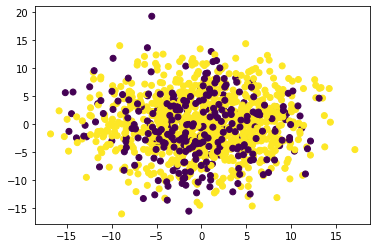

In [50]:
colors = y[y == 0]
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y);

In [51]:
embedding = MDS(n_components=2)

In [52]:
X_MDS = embedding.fit_transform(X)

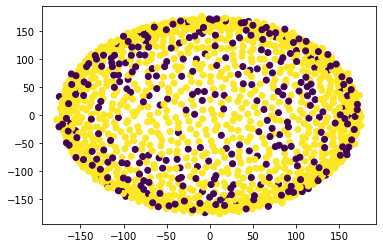

In [53]:
plt.scatter(X_MDS[:,0], X_MDS[:,1], c=y);

In [54]:
X_TSNE = TSNE().fit_transform(X)
X_TSNE.shape

(1228, 2)

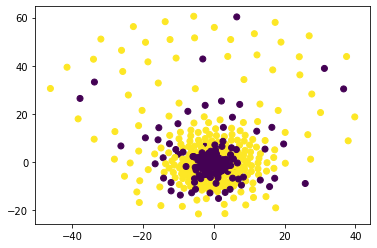

In [55]:
plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c=y);

In [71]:
X_TSNE = TSNE(n_components=64, method='exact', n_iter=250, verbose=100, n_jobs=-1).fit_transform(X)
X_TSNE.shape

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 1228
[t-SNE] Computed conditional probabilities for sample 1228 / 1228
[t-SNE] Mean sigma: 21.134376
[t-SNE] Iteration 50: error = 49.5744764, gradient norm = 0.0530863 (50 iterations in 22.841s)
[t-SNE] Iteration 100: error = 51.0131159, gradient norm = 0.0657304 (50 iterations in 30.787s)
[t-SNE] Iteration 150: error = 50.9811486, gradient norm = 0.0476354 (50 iterations in 24.547s)
[t-SNE] Iteration 200: error = 50.9558207, gradient norm = 0.0499528 (50 iterations in 19.081s)
[t-SNE] Iteration 250: error = 50.8649208, gradient norm = 0.0487015 (50 iterations in 22.938s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.864921
[t-SNE] KL divergence after 251 iterations: 17976931348623157081452742373170435679807056752584499659891747680315726078002853876058955863276687817154045895351438246423432132688946418276846754670353751698604991057655128207624549009038932894407

(1228, 64)

In [ ]:
clf = XGBClassifier(n_estimators=30,
                    use_label_encoder=False,
                    scale_pos_weight=3,
                    learning_rate=0.1,
                    max_depth=10)


scores = {'accuracy': [],
          'precision': [],
          'recall': [],
          'F1-score': [],
          'recall -': [],
          'precision -': [],
          }

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  stratify=y,
                                                  random_state=42)

clf.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        eval_metric='error',
        # early_stopping_rounds=4,
        verbose=True)

print('___')

scores['accuracy'].append(accuracy_score(y_val, clf.predict(X_val)))
scores['precision'].append(precision_score(y_val, clf.predict(X_val)))
scores['recall'].append(recall_score(y_val, clf.predict(X_val)))
scores['F1-score'].append(f1_score(y_val, clf.predict(X_val)))
scores['recall -'].append(recall_score(y_val, clf.predict(X_val), pos_label=0))
scores['precision -'].append(precision_score(y_val, clf.predict(X_val), pos_label=0, zero_division=0))

scores


In [27]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [36]:
X.shape, y.shape, np.unique(y, return_counts=True)

((1228, 67925), (1228,), (array([0, 1]), array([305, 923])))

In [12]:
test_index_0 = np.random.choice(np.argwhere(y == 0)[:, 0], size=100, replace=False)
test_index_1 = np.random.choice(np.argwhere(y == 1)[:, 0], size=100, replace=False)
test_index = np.append(test_index_0, test_index_1)
X_test, y_test = X[test_index], y[test_index]

In [13]:
mask = np.ones(len(X), bool)
mask[test_index] = 0
X_train, y_train = X[mask], y[mask]

In [14]:
X_train.shape, y_train.shape, np.unique(y_train, return_counts=True)

((1028, 67925), (1028,), (array([0, 1]), array([205, 823])))

In [15]:
X_test.shape, y_test.shape, np.unique(y_test, return_counts=True)

((200, 67925), (200,), (array([0, 1]), array([100, 100])))

In [43]:
sampler = SMOTE(k_neighbors=1, n_jobs=-1, random_state=42)
X_train_res, y_train_res = sampler.fit_resample(X_train, y_train)

In [74]:
sampler = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = sampler.fit_resample(X_train, y_train)

In [75]:
np.unique(y_train_res, return_counts=True)

(array([0, 1]), array([205, 205]))

In [50]:
clf = XGBClassifier(n_estimators=150,
                    use_label_encoder=False,
                    scale_pos_weight=0.000001,
                    learning_rate=0.05,
                    min_child_weight=50,
                    max_depth=3)


scores = {'accuracy': [],
          'precision': [],
          'recall': [],
          'F1-score': [],
          'recall -': [],
          'precision -': [],
          }

X_train, y_train = X_train, y_train

clf.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='error',
        early_stopping_rounds=15,
        verbose=True)

print('___')

scores['accuracy'].append(accuracy_score(y_test, clf.predict(X_test)))
scores['precision'].append(precision_score(y_test, clf.predict(X_test)))
scores['recall'].append(recall_score(y_test, clf.predict(X_test)))
scores['F1-score'].append(f1_score(y_test, clf.predict(X_test)))
scores['recall -'].append(recall_score(y_test, clf.predict(X_test), pos_label=0))
scores['precision -'].append(precision_score(y_test, clf.predict(X_test), pos_label=0, zero_division=0))

scores

[0]	validation_0-error:0.80058	validation_1-error:0.50000
[1]	validation_0-error:0.80058	validation_1-error:0.50000
[2]	validation_0-error:0.80058	validation_1-error:0.50000
[3]	validation_0-error:0.80058	validation_1-error:0.50000
[4]	validation_0-error:0.80058	validation_1-error:0.50000
[5]	validation_0-error:0.80058	validation_1-error:0.50000
[6]	validation_0-error:0.80058	validation_1-error:0.50000
[7]	validation_0-error:0.80058	validation_1-error:0.50000
[8]	validation_0-error:0.80058	validation_1-error:0.50000
[9]	validation_0-error:0.80058	validation_1-error:0.50000
[10]	validation_0-error:0.80058	validation_1-error:0.50000
[11]	validation_0-error:0.80058	validation_1-error:0.50000
[12]	validation_0-error:0.80058	validation_1-error:0.50000
[13]	validation_0-error:0.80058	validation_1-error:0.50000
[14]	validation_0-error:0.80058	validation_1-error:0.50000
___


/home/stasvlad/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': [0.5],
 'precision': [0.0],
 'recall': [0.0],
 'F1-score': [0.0],
 'recall -': [1.0],
 'precision -': [0.5]}

In [63]:
f = np.apply_along_axis(lambda x: np.unique(x, return_counts=True)[1], 1, arr=X)